# Keras DL - MNIST

In [2]:
#only need to run this once
#!python -m pip install -U numpy pandas pyarrow scipy matplotlib scikit-learn

In [3]:
#had to run this on terminal
# Force reinstall NumPy < 2
# python -m pip install "numpy<2.0" --upgrade --force-reinstall

# Upgrade core ML libraries
# python -m pip install --upgrade pandas scipy scikit-learn matplotlib tensorflow keras


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
%pwd

'C:\\Users\\quinc\\Documents\\MLM25\\python_mlm25\\Keras'

# Training dataset

In [8]:
# load training dataset
df_train = pd.read_csv('../../digit-recognizer/train.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# separate features (X) and labels (y)
x = df_train.drop('label', axis=1).values
y = df_train['label']

In [10]:
#normalise dataset to [0,1]
x = x.astype("float32")/255

In [11]:
#reshape for CNN
x = x.reshape(-1, 28, 28, 1)

In [12]:
# split df_train into 80% training, 20% for validation test
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size = 0.2, random_state = 12)

# Load models

In [14]:
#load models from .h5
#loaded_model_ori = keras.models.load_model('keras_model_ori.h5')
#loaded_model_es = keras.models.load_model('keras_model_es.h5')
#loaded_model_50 = keras.models.load_model('keras_model_50.h5')

## Build CNN model

In [16]:
#build CNN model
model = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten for dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 digits)
    layers.Dense(10, activation='softmax')

])

model.summary() # check the model structure

C:\Users\quinc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
# train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=5,
    batch_size=128
)

Epoch 1/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8679 - loss: 0.4252 - val_accuracy: 0.9686 - val_loss: 0.0998
Epoch 2/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9620 - loss: 0.1291 - val_accuracy: 0.9767 - val_loss: 0.0686
Epoch 3/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9725 - loss: 0.0916 - val_accuracy: 0.9817 - val_loss: 0.0559
Epoch 4/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9779 - loss: 0.0715 - val_accuracy: 0.9840 - val_loss: 0.0503
Epoch 5/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9830 - loss: 0.0589 - val_accuracy: 0.9861 - val_loss: 0.0448


In [19]:
# evaluate on validation set
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0448
Validation accuracy: 0.9861


In [20]:
#save original model
model.save('keras_model_ori.keras')

### with early stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [24]:
# reinitialise the model by running the model = keras.Sequential([...]) & model.compile(...)

In [25]:
#build CNN model
model_es = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten for dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 digits)
    layers.Dense(10, activation='softmax')

])

model_es.summary() # check the model structure

C:\Users\quinc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# compile the model
model_es.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
#store new training history as a different variable
history_es = model_es.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs = 50, #set large; early stopping will stop it early once model stops improving
    batch_size = 128,
    callbacks=[early_stop] # use the callback here
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8704 - loss: 0.4171 - val_accuracy: 0.9670 - val_loss: 0.1027
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.9616 - loss: 0.1266 - val_accuracy: 0.9799 - val_loss: 0.0618
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.9730 - loss: 0.0871 - val_accuracy: 0.9833 - val_loss: 0.0529
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9844 - val_loss: 0.0479
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9828 - loss: 0.0592 - val_accuracy: 0.9863 - val_loss: 0.0434
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9848 - loss: 0.0504 - val_accuracy: 0.9869 - val_loss: 0.0427
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9853 - loss: 0.0457 - val_accuracy: 0.9869 - val_loss: 0.0430
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9883 - loss: 0.0371 - val_

In [28]:
# evaluate on validation set
val_loss, val_acc = model_es.evaluate(x_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9900 - loss: 0.0338
Validation accuracy: 0.9900


In [29]:
#save the model_es
model_es.save('keras_model_es.keras')

In [30]:
# print image and labels that were predicted incorrectly
# Get predictions (probabilities)
y_pred_probs = model_es.predict(x_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Find which indices were predicted incorrectly
wrong_indices = np.where(y_pred != y_val)[0]

print(f"Total misclassified: {len(wrong_indices)} out of {len(y_val)}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Total misclassified: 84 out of 8400


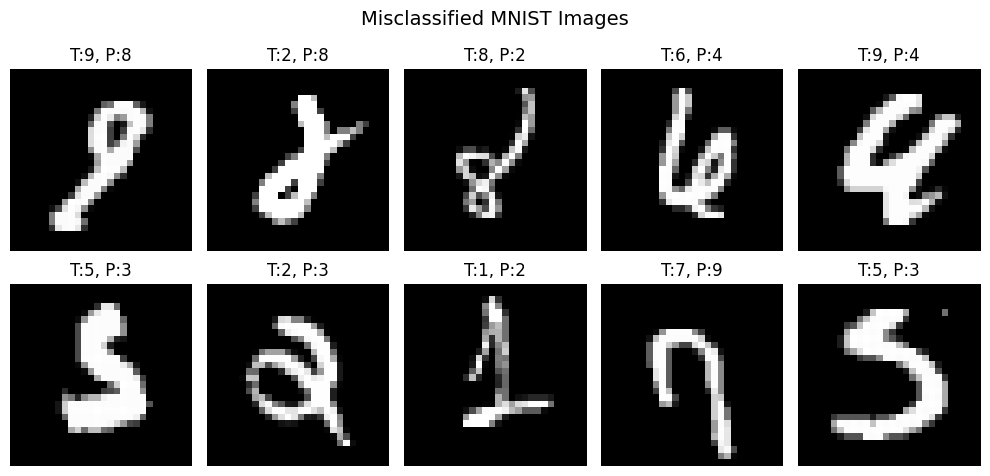

In [31]:
# plot the misclassified images

# Ensure y_val is a NumPy array
y_val_np = np.array(y_val)

X_misclassified = x_val[wrong_indices]
y_misclassified_true = y_val_np[wrong_indices]
y_misclassified_pred = y_pred[wrong_indices]

sample_indices = np.random.choice(len(X_misclassified), 10, replace = False)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    idx = sample_indices[i]
    image = X_misclassified[idx].reshape(28, 28)
    true_label = y_misclassified_true[idx]
    pred_label = y_misclassified_pred[idx]
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"T:{true_label}, P:{pred_label}")
    ax.axis('off')

plt.suptitle("Misclassified MNIST Images", fontsize=14)
plt.tight_layout()
plt.show()

## epoch 50 (no early stop)

In [33]:
#build CNN model
model_50 = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten for dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 digits)
    layers.Dense(10, activation='softmax')

])

model_50.summary() # check the model structure

C:\Users\quinc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# compile the model
model_50.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
#store new training history as a different variable
history_50 = model_50.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs = 50, #set large
    batch_size = 128
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.8688 - loss: 0.4273 - val_accuracy: 0.9689 - val_loss: 0.0960
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.9600 - loss: 0.1392 - val_accuracy: 0.9769 - val_loss: 0.0707
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.9700 - loss: 0.1022 - val_accuracy: 0.9817 - val_loss: 0.0595
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9749 - loss: 0.0822 - val_accuracy: 0.9869 - val_loss: 0.0457
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9808 - loss: 0.0673 - val_accuracy: 0.9871 - val_loss: 0.0434
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9821 - loss: 0.0599 - val_accuracy: 0.9873 - val_loss: 0.0409
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9880 - val_loss: 0.0388
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9854 - loss: 0.0466 - v

In [36]:
# evaluate on validation set
val_loss, val_acc = model_50.evaluate(x_val, y_val)
print(f"Validation accuracy for model_50: {val_acc:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9911 - loss: 0.0543
Validation accuracy for model_50: 0.9911


In [37]:
#save model_50
model_50.save('keras_50epoch.keras')

## Model comparison

In [39]:
# Original training
print(history.history.keys())

# Early stopping training
print(history_es.history.keys())

#50epoch training
print(history_50.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


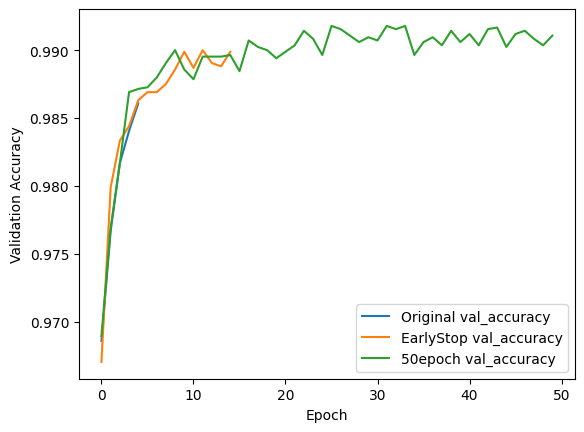

In [40]:
# Accuracy comparison
plt.plot(history.history['val_accuracy'], label='Original val_accuracy')
plt.plot(history_es.history['val_accuracy'], label='EarlyStop val_accuracy')
plt.plot(history_50.history['val_accuracy'], label='50epoch val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

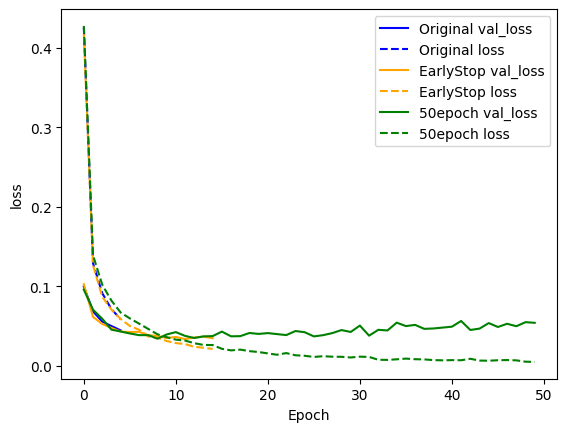

In [41]:
# val_loss and train_loss comparison
plt.plot(history.history['val_loss'], label='Original val_loss', color='blue')
plt.plot(history.history['loss'], label='Original loss', color='blue', linestyle='--')

plt.plot(history_es.history['val_loss'], label='EarlyStop val_loss', color='orange')
plt.plot(history_es.history['loss'], label='EarlyStop loss', color='orange', linestyle='--')

plt.plot(history_50.history['val_loss'], label='50epoch val_loss', color='green')
plt.plot(history_50.history['loss'], label='50epoch loss', color='green', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



# run prediction on test data

In [43]:
#load test dataset
df_test = pd.read_csv("../../digit-recognizer/test.csv")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#extract features and normalise
x_test = df_test.values / 255.0 # normalise to [0,1]

# reshape to 28x28x1 for CNN
x_test = x_test.reshape(-1, 28, 28, 1)

In [60]:
#use model_es (the early stop model) for prediction
y_pred_probs_es = model_es.predict(x_test) # return probabilities
y_pred_es = y_pred_probs_es.argmax(axis = 1) # convert to class labels 0-9

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [61]:
submission_es = pd.DataFrame({
    "ImageId": range(1, len(y_pred_es)+1),  # 1-based indexing
    "Label": y_pred_es
})

submission_es.to_csv("QR_keras_predictions_es_v2.csv", index=False)

In [62]:
#use model (epoch = 5) for prediction
y_pred_probs_ori = model.predict(x_test) # return probabilities
y_pred_ori = y_pred_probs_ori.argmax(axis = 1) # convert to class labels 0-9

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [63]:
submission_ori = pd.DataFrame({
    "ImageId": range(1, len(y_pred_ori)+1),  # 1-based indexing
    "Label": y_pred_ori
})

submission_ori.to_csv("QR_keras_predictions_ori_v2.csv", index=False)

In [64]:
# use 50epoch model for prediction
y_pred_probs_50 = model_50.predict(x_test)
y_pred_50 = y_pred_probs_50.argmax(axis = 1)

submission_50 = pd.DataFrame({
    "ImageId": range(1, len(y_pred_50)+1),  # 1-based indexing
    "Label": y_pred_50
})

submission_50.to_csv("QR_keras_predictions_50epoch_v2.csv", index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
